In [56]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--j3p-content-font-size4);
    background-color:#4269E1  ;
    color: white;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

 img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 100px 70px 150px 70px; 
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(173, 216, 230, 1) 0 6px 6px rgba(173, 216, 230, 1);
        }
video {
    width: 820px; /* Set the width of the video */
    height: auto; /* Adjust the height automatically */
    border-radius: 25px; /* Add a border radius for rounded corners */
    border: 5px solid #eee; /* Add a border */
    box-shadow: 0 10px 20px rgba(173, 216, 230, 1), 0 6px 6px rgba(173, 216, 230, 1); /* Add a box shadow */
    display: flex;
    controls: autoplay;
    align-items: center;
    justify-content: center;
    transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
  }

  video:active {
    box-shadow: 0 10px 20px rgba(173, 216, 230, 1), 0 6px 6px rgba(173, 216, 230, 1);
  }


</style>
''')        

## Spam emails prediction 

<img src="https://media.istockphoto.com/id/1880523010/photo/password-cyber-security-ransomware-email-phishing-encrypted-technology-digital-information.jpg?s=612x612&w=0&k=20&c=jy9sTEomP0GKbHWPBdueNRlSLtDt70RKasXAj9eo83Q=" alt="My Image">

## Table of Contents 

<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

   
    
    
<p> &bull;        <a target="_blank"> Introudction</a>  </p> 

<p> &bull;      <a target="_blank"> Explantory Data Analysis</a>  </p>

<p>&bull;       <a target="_blank"> Data Processing</a>  </p>

<p>&bull;       <a target="_blank"> Model Bulding</a> </p>   
    
<p>&bull;       <a target="_blank"> Evalution Metrics </a> </p> 

<p>&bull;       <a target="_blank"> Results & see the best models </a> </p>   

</div>

In [57]:
from IPython.display import HTML, display

video_path = 'https://media.istockphoto.com/id/1925293791/video/million-of-flush-email-in-black-background.mp4?s=mp4-640x640-is&k=20&c=icMm8qrk9EbOZ1hCNCevTYHibSiBuibwGVrGh9AHxNU='

# Create the HTML video element with autoplay enabled
video_html = f"""
<video width="320" height="240" controls autoplay>
  <source src="{video_path}" type="video/mp4">
  Your browser does not support the video tag.
</video>
"""
display(HTML(video_html))

## Data Information

<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">


 

<p>&bull; The objective is to predict if message is spam or not (1/0)  </p>

<p>&bull; this Data Download from the Kaggle .    </p>

<p>&bull; This Dataset Contains Two Columns </p> 

<p>&bull;Category (spam or ham (1/0)) </p>

<p>&bull; Message </p>

</div>

## Dataset Features 

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| Category      | spam / ham                                                                                      |
| Message         | Content of the message                                                                        |

## Understand the problem :








<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; This problem Consider as Binary Classification   .</p> 

<p> &bull; Target of this problem to predict & classifiy if the message or spam or not  (1 or 0)  .</p> 


<p> &bull; I will Train 5 models for Machine learning with visualization of them. (K-Nearest Neighbors (KNN),Random ForestClassiﬁer),Decision Tree Classiﬁer, Logistic Regression) ,adaboosting classiﬁer .</p> 

<p> &bull; Also i will Train Artifical Neural Network model (ANNs) and Evalution Metrics for it . </p>

<p>&bull; Also i will Make Explanory Analysis for the Data By using  Pandas  </p>

   
</div>

## Import Libararies 

In [58]:
!pip install wordcloud

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix ,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from plotly.graph_objs import *
import plotly.express as px 
from wordcloud import WordCloud, ImageColorGenerator
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
# load the Data:

data=pd.read_csv("spam.csv")
data.head(15)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Explore the Data 

In [61]:
#get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
-------------------------
shape of the dataset -->> (5572, 2)


In [62]:
#get the statistical:
data.describe().T

,count,unique,top,freq
Category,5572,2,ham,4825
Message,5572,5157,"Sorry, I'll call later",30


In [63]:
# get Types of features:

data.dtypes

Category    object
Message     object
dtype: object

In [64]:
# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in  \n -->> {data[col].value_counts()}")
    print("-"*25)

counts of items in  
 -->> Category
ham     4825
spam     747
Name: count, dtype: int64
-------------------------
counts of items in  
 -->> Message
Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                        

In [65]:
# to know the uniques values in evey column in the dataset:
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>Category column  :  
['ham' 'spam']
**************************************************
All items in the ---->>>Message column  :  
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
**************************************************


In [66]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns

    num_cols=data.select_dtypes("number").columns

    disc_cols=data.select_dtypes(include=("int64")).columns

    conts_cols=data.select_dtypes(include=("float64")).columns

    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['Category', 'Message'], dtype='object')
 Numerical_columns ----->>> Index([], dtype='object') 
 Discrete_columns ---->>> Index([], dtype='object') 
 Continous_cols ----->> Index([], dtype='object') 
 Nominal Columns --->> Category    2
dtype: int64


In [67]:
#check missing values:

data.isna().sum()

Category    0
Message     0
dtype: int64

## Explore Data :








<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; After Explore the data , found that :   .</p> 

<p> &bull; there are 5572 rows & 2 features  </p> 

<p> &bull; All features are categorical/object .</p> 

<p> &bull; Also found that there 747 spam message & 4825 ham messages . </p>

<p>&bull; Also the most frequency message : (Sorry, I'll call later), it found 30 times   </p>

   
</div>

## Cleaning :



<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; we checked the missing values before , Not found any missing values . </p> 

<p> &bull; I used the Simple Imputer Method to fill the missing  Values . </p> 

<p> &bull; I used median Strategy with Numerical Features  .</p> 

<p> &bull; I used the most_frequent (mode) Strategy with Categorical Features  .</p> 

<p> &bull; I make Reshape , then i make squeeze on it  . </p>

<p> &bull; Also , i checked the duplicates values , & delete if found any duplicates values . </p>

<p> &bull; Also , found 415 duplicated values , then i deleted it  . </p>

</div>

In [68]:
# Not found any missing values :
data.isna().mean()

Category    0.0
Message     0.0
dtype: float64

In [69]:
# fill any null values if found  with ctegorical/object data :

for col in data.select_dtypes("object").columns:
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    data[col] = np.squeeze(imputed_values)
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [70]:
# Check if there are aduplicated values in the data & drop it if found :
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)
df = df.drop_duplicates()
duplicated_features=df.duplicated().sum()
print("Number of duplicates of cleaning it ----->>> ",duplicated_features)

Number of duplicates ----->>>  415
Number of duplicates of cleaning it ----->>>  0


## preprocess on Data :

<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; i used some methods from NLTK pkg to handle the data & get ride from unnecessary objects  . </p> 

<p> &bull; i used WordNetLemmatizer to get the stem of the word </p> 

<p> &bull; I used stopwords to remove stopwords (!,?,.,_)  .</p> 

<p> &bull; i used split on the sentence to splitting & tokenizing it into words .</p> 

<p> &bull; i used lower to get lowercase of words  . </p>

<p> &bull; Also , i used re.sub to get ride from any thing except alphapets . </p>

<p> &bull; After this i divide data into x,y  . </p>

<p> &bull; x : refer to corpus (x) (message after all process the done on it) . </p>

<p> &bull; y : refer to Category (target of the problem (ham(0)/spam(1))) . </p>

<p> &bull; at , the end i used .join() to joining the words to rearrage to form the sent without stop words  . </p>

<p> &bull; i used CountVectorizer on corpus (x_class) turn categorical data into numerical data . </p>

<p> &bull; Also used Labelencoder on y_class to convert categorical into numerical data. </p>




</div>


In [71]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sangw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sangw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
# preprocess on the data :
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(len(data)):
    review=re.sub('[^a-zA-Z0-9]',' ',data['Message'][i])  
    review=review.lower()                                 
    review=review.split()                                
    review=[lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]      
    review=' '.join(review)                                
    corpus.append(review)

In [73]:
# Vectorization the Data :

# Converting the Words to Vector using Bag of words
# split data into x_class, y_class :

cv=CountVectorizer(max_features=2500,ngram_range=(1,3))

x_class,y_clss=make_classification(n_samples=100,random_state=42)
x_class=cv.fit_transform(corpus)

# Convert all Categorical data for y_class  into Numerical columns :

label_encoder=LabelEncoder()
y_class=label_encoder.fit_transform(data["Category"])

print("x_class shape",np.shape(x_class))
print("y_class shape",np.shape(y_class))


x_class shape (5572, 2500)
y_class shape (5572,)


## Split Data into train & test sets :








<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; i used train_test_split fom sklearn pkg to Divide data into 4 sets  (x_train,x_test,y_train,y_test).</p> 

<p> &bull; Also i used make classification on this task  </p> 

<p> &bull; At the End we Divided the data by 20% for testing ,80% for training  & get the shape of every set</p> 
   
</div>

In [74]:
# make train_test_split on the Data :

x_train,x_test,y_train,y_test=train_test_split(x_class,y_class,test_size=0.2,random_state=42)
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (4457, 2500)
x_test shape :  (1115, 2500)
y_train shape :  (4457,)
y_test shape :  (1115,)


## visualize the Data :

In [75]:
# Calculate the value counts
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Define the color palette
color_palette = ['#8B008B', '#1E90FF']

# Create the pie chart
fig = px.pie(category_counts, names='Category', values='Count', color_discrete_sequence=color_palette)

# Update the layout
fig.update_layout(
    title="Observation Category",
    legend_title="Category",
    width=800,
    height=600
)

# Show the plot
fig.show()

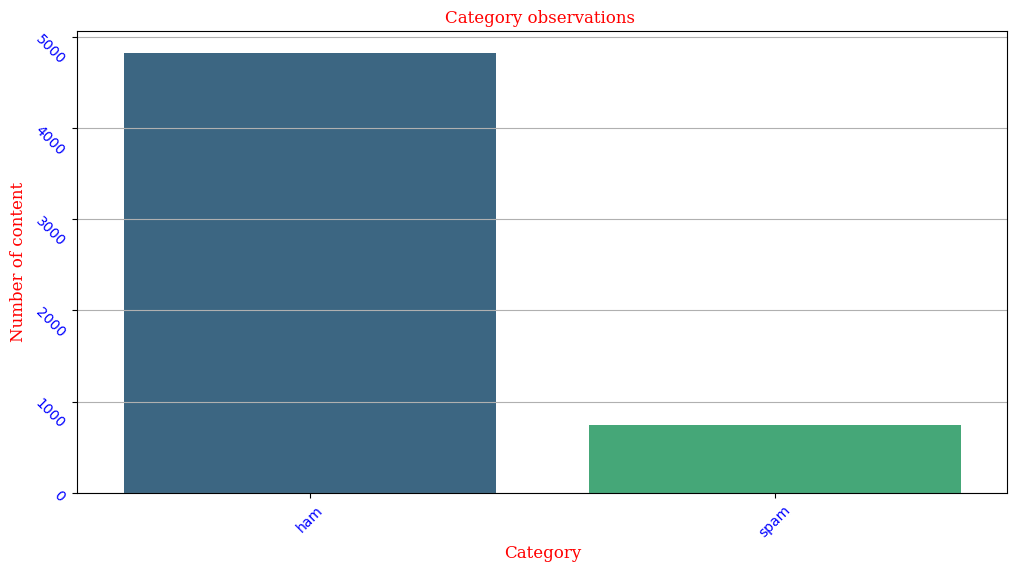

In [76]:
# plot the  : 
f1 = {"family": "serif", "size": 12, "color": "r"}
color_palette = ['green', 'darkgreen']
cat = data['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=cat.index, y=cat.values,hue=cat.index,palette="viridis")
plt.title('Category observations ',fontdict=f1)
plt.xlabel('Category',fontdict=f1)
plt.ylabel('Number of content',fontdict=f1)
plt.grid(True, axis='y')
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.show()

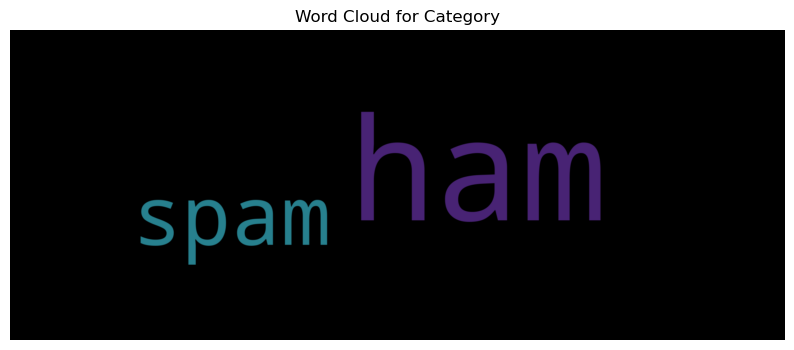

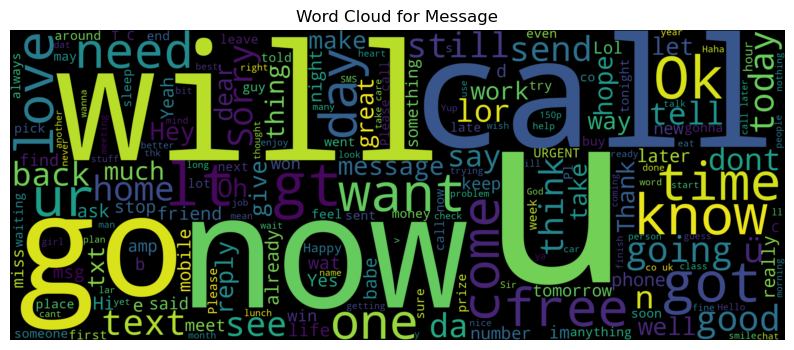

In [77]:
from wordcloud import WordCloud
# Sample DataFrame
data1 =data["Message"]

# Select object columns
object_columns = data.select_dtypes(include=['object'])

# Iterate over each object column and generate a word cloud
for column in object_columns.columns:
    # Join the text data into a single string
    text = ' '.join(object_columns[column].astype(str))
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=2500, height=1000, random_state=1).generate(text)
    
    # Display the generated Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title(f'Word Cloud for {column}')
    plt.show()

## Bulding Five Traditional Machine Learning Modules :

<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

                             
<p> &bull; KNeighborsClassifier (KNN) </p> 

<p> &bull; RandomForestClassiﬁer </p> 

<p> &bull; Decision Tree Classiﬁer </p> 

<p> &bull; Logistic Regression </p> 

<p> &bull; adaboosting classiﬁer</p>

</div>


In [78]:
models={
    "LogisticRegression":LogisticRegression(random_state=42),
    "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=5,random_state=42),
    "RandomForestClassifier":RandomForestClassifier(random_state=42),
    "knn_classifier" : KNeighborsClassifier(n_neighbors=2),
    "adboosting":AdaBoostClassifier(n_estimators=50, random_state=42)
          }

Model: LogisticRegression
Mean Squared Error (MSE): 0.016143497757847534
model_accuracy: 98.39%
LogisticRegression Evaluation Metrics:
LogisticRegression R^2 Score: 86.06%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.88      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------
Model: DecisionTreeClassifier
Mean Squared Error (MSE): 0.060089686098654706
model_accuracy: 93.99%
DecisionTreeClassifier Evaluation Metrics:
DecisionTreeClassifier R^2 Score: 48.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       966
           1       0.96      0.58      0.72       149

    accuracy                           0.94      1115


C:\Users\sangw\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Model: adboosting
Mean Squared Error (MSE): 0.017937219730941704
model_accuracy: 98.21%
adboosting Evaluation Metrics:
adboosting R^2 Score: 84.51%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------


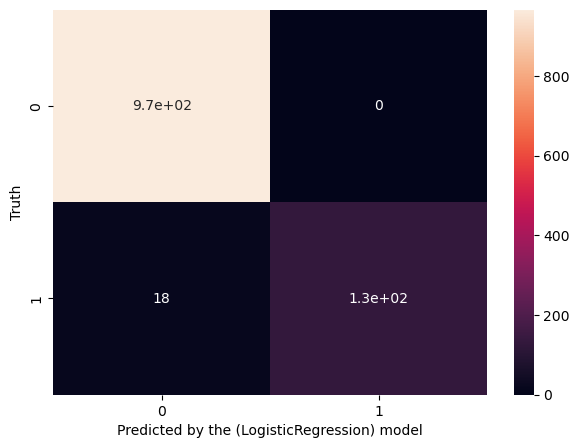

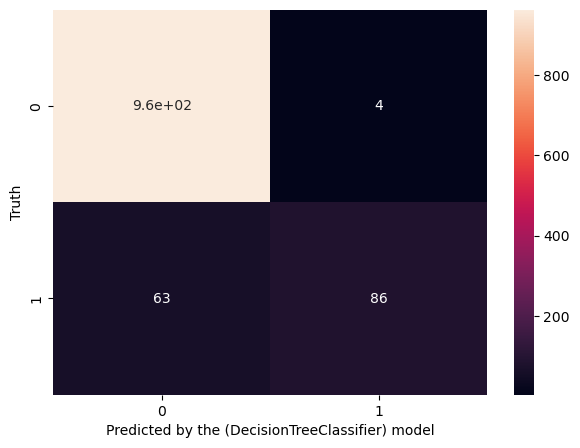

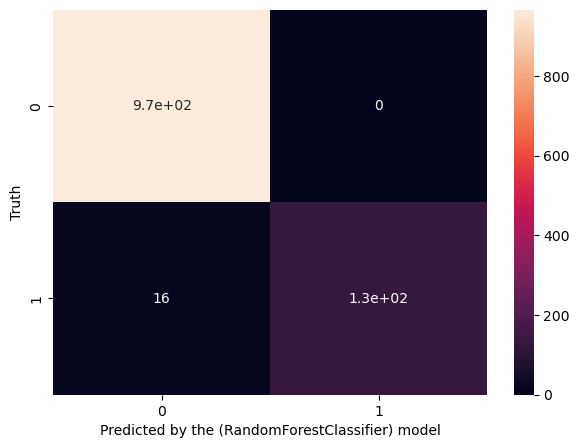

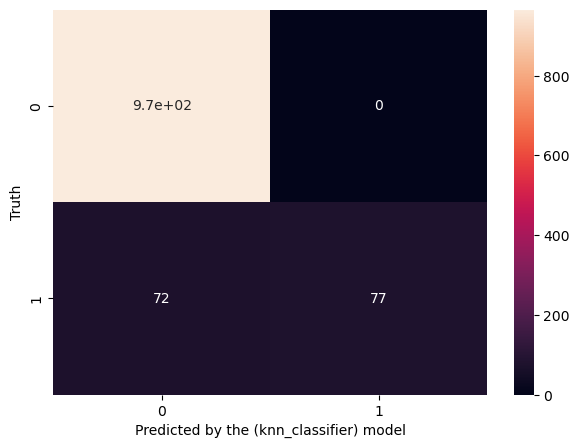

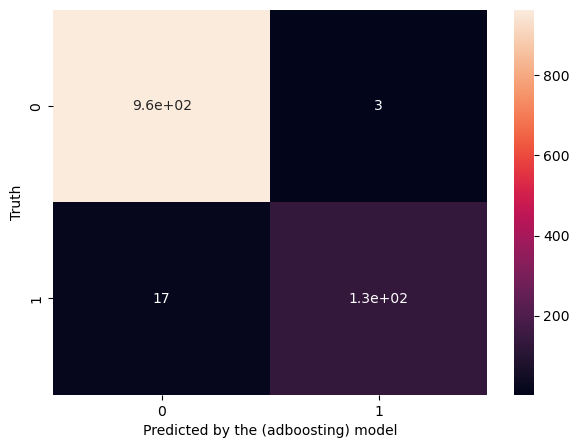

In [79]:
for model_name, model in models.items():
    # Fit the model to the training data
    
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    
    y_pred = model.predict(x_test)
    
    # Evaluate the model
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    acc = model.score(x_test,y_test)

    model_evaluation_metrics = {}
    # Calculate confusion matrix and classification report
    
    cm = confusion_matrix(y_test, y_pred)
    classif_report = classification_report(y_test, y_pred)

    # Calculate R^2 score
    
    r2 = metrics.r2_score(y_test, y_pred)
    
    # Store the evaluation metric
    model_evaluation_metrics[model_name] = r2
    
    # Storing the results
    
    model_evaluation_metrics[model_name] = {
        "Confusion Matrix":cm,
        'Classification Report': classif_report
            }
    
    plt.figure(figsize=(7,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel(f"Predicted by the ({model_name}) model")
    plt.ylabel('Truth'),
    
    # Print the evaluation metrics for each model
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"model_accuracy: {acc*100:0.2f}%")
    print(f"{model_name} Evaluation Metrics:")
    print(f"{model_name} R^2 Score: {(abs(r2) * 100):.2f}%")
    print("\nClassification Report:")
    print(classif_report)
    print("-"*50)
    
    

In [80]:
# Explain the prediction for DecisionTree_model :
DT=models["DecisionTreeClassifier"]
tree_representation = tree.export_text(DT)
print(tree_representation)

|--- feature_396 <= 0.50
|   |--- feature_2230 <= 0.50
|   |   |--- feature_2468 <= 0.50
|   |   |   |--- feature_846 <= 0.50
|   |   |   |   |--- feature_498 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_498 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_846 >  0.50
|   |   |   |   |--- feature_901 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_901 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2468 >  0.50
|   |   |   |--- feature_1335 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1335 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_2230 >  0.50
|   |   |--- feature_2083 <= 0.50
|   |   |   |--- feature_1032 <= 0.50
|   |   |   |   |--- feature_1569 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1569 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1032 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_2083 >  0.50
|   |   |  

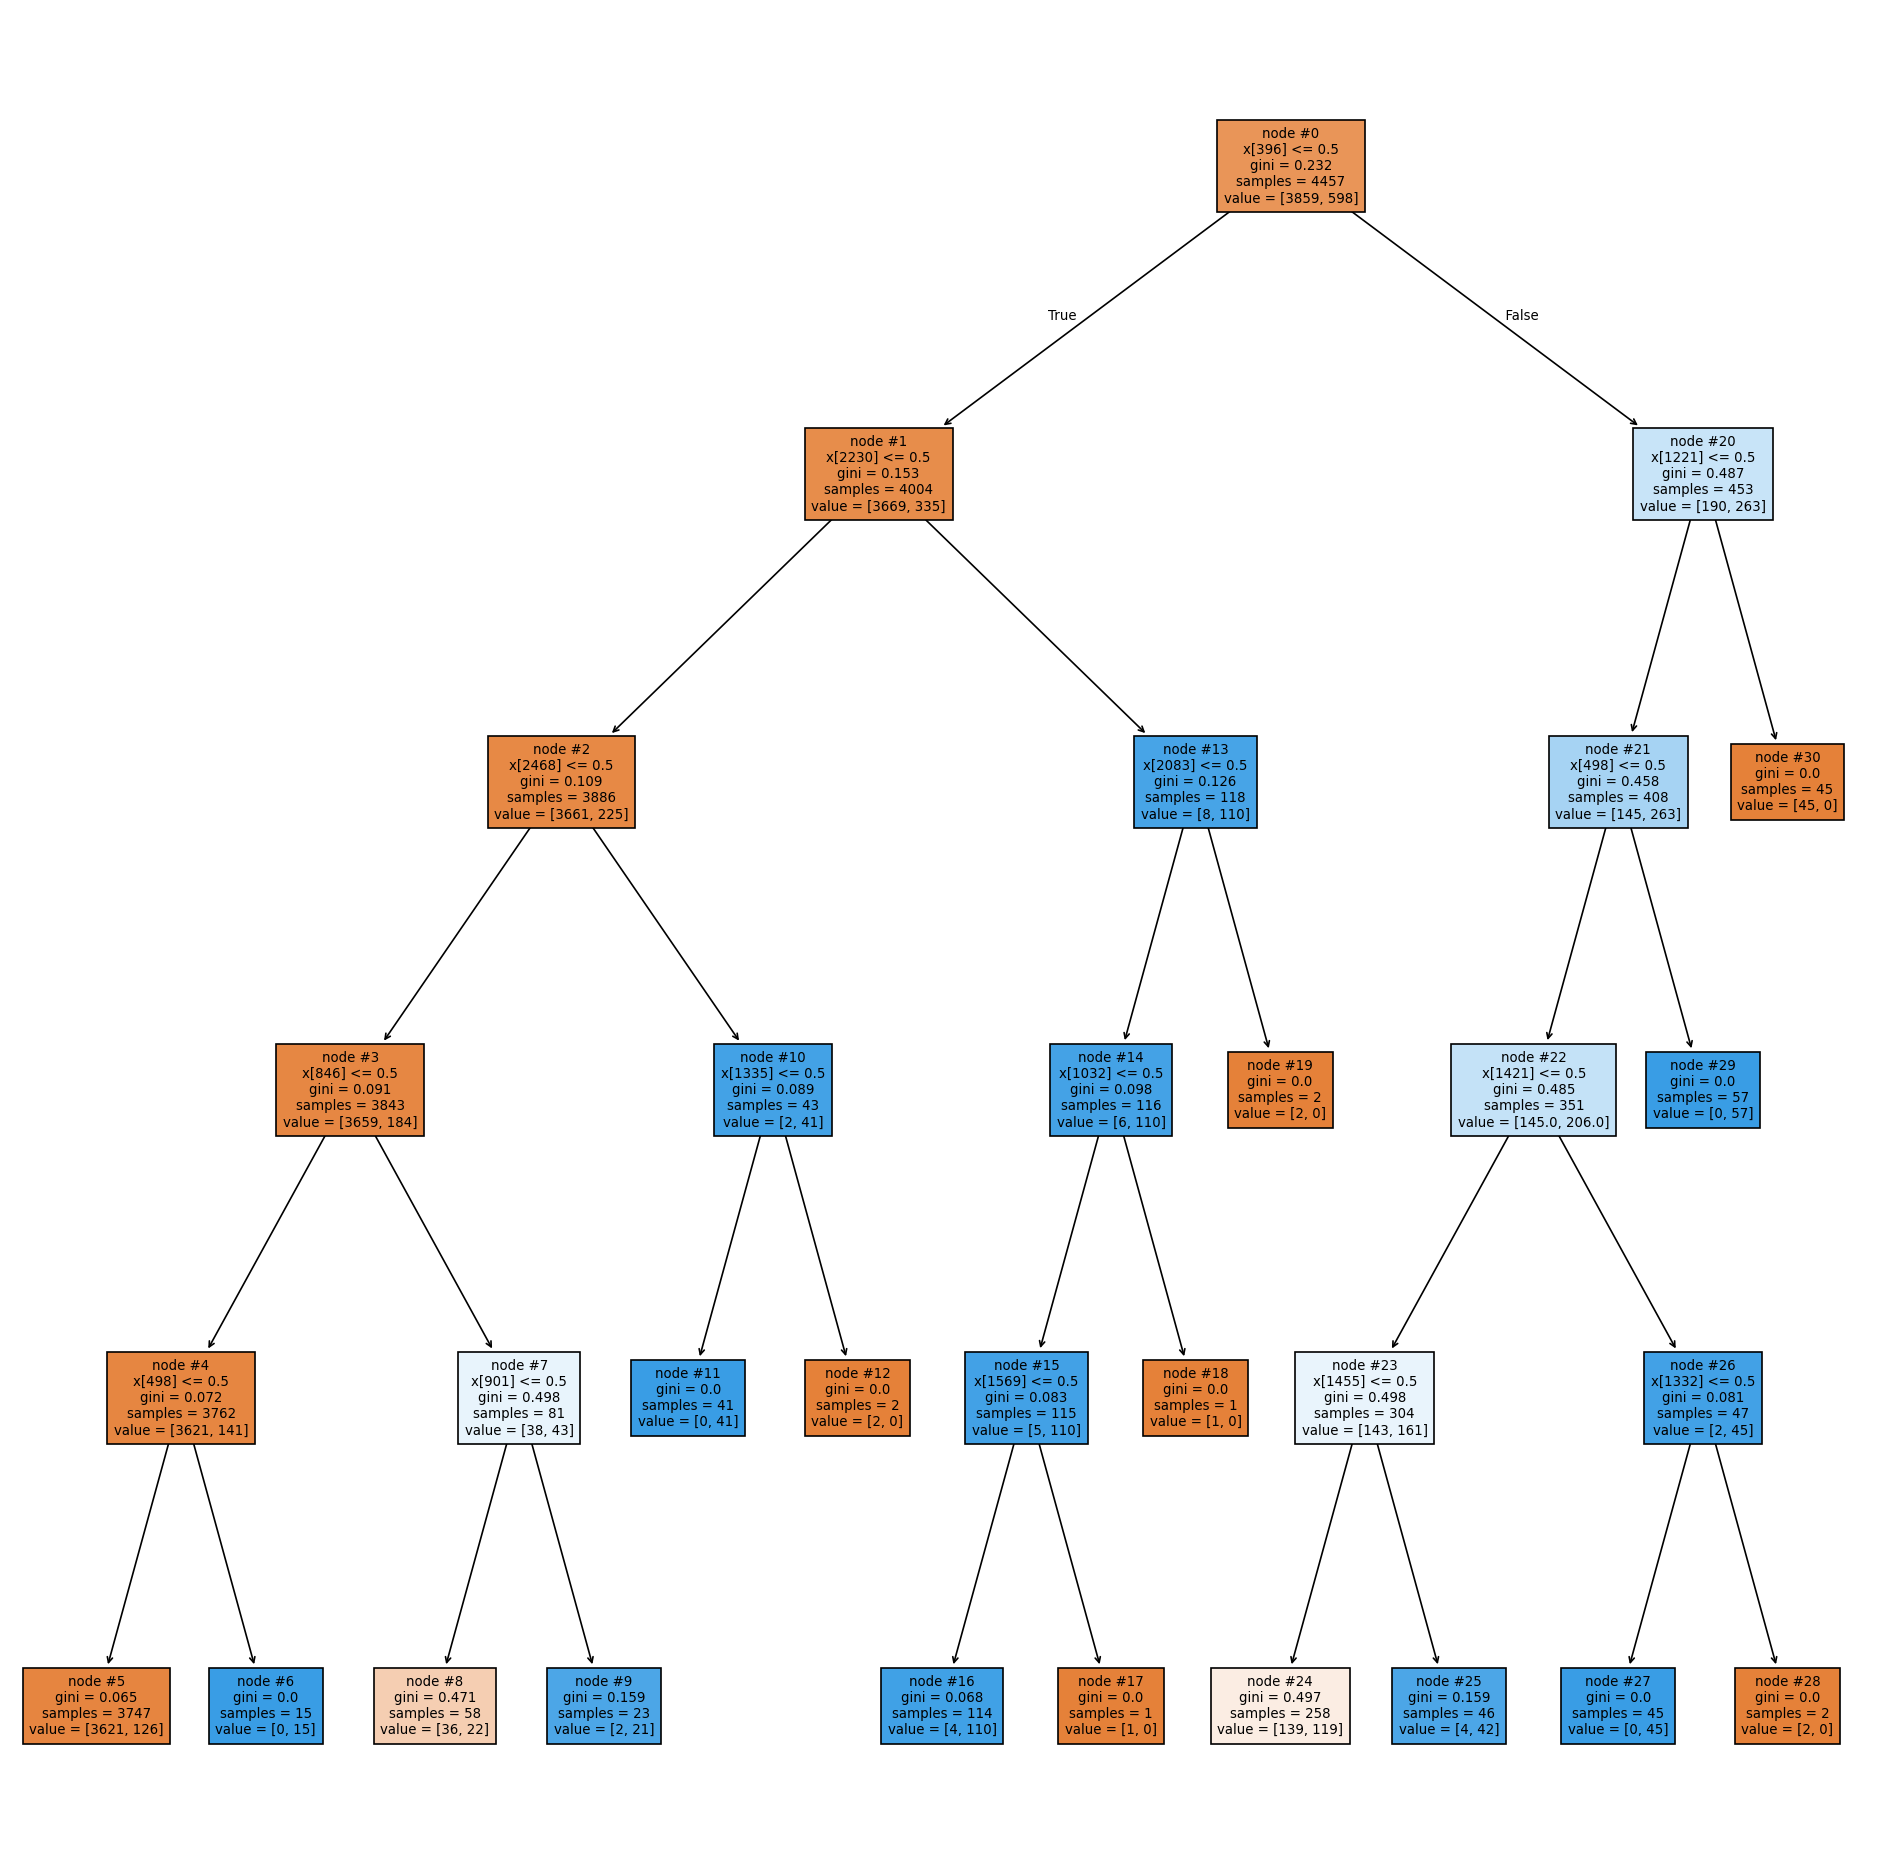

In [81]:
# Create the decision tree model
decision_tree_model = models["DecisionTreeClassifier"]

# Plot the tree
plt.figure(figsize=(20, 20), dpi=120)  # Adjust figure size as needed
tree.plot_tree(decision_tree_model, filled=True, node_ids=True, fontsize=8)
plt.show()

## LSTM Neural Network Model :

In [82]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Flatten
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard
import datetime
import os
import tensorflow as tf

## preprocessing 

<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

                             
<p> &bull;i used labelencoder : to convert any categorical values into numerical. </p> 

<p> &bull; then divide the data into data & target </p> 

<p> &bull; then i make train_test_split on data to divided into 4 sets with 20% for testing , 80% for training. </p> 

<p> &bull; then i make tokenize on data , to vectorize it & fit it on X_train set </p> 

<p> &bull; i used texts_to_sequences to convert words after i make okenize on it into sentences </p>

<p>&bull; i used pad_sequences :  to preprocess sequence data by padding or truncating the sequences to a fixed length. </p>

<p>&bull; after this i convert the labels into categorical & define number of classes (2 class)  </p>

</div>


In [83]:
# Convert categories to binary labels
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['Category'])

# Separate features and labels
X = df['Message']
y = df['category_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text
vocab_size = 10000
oov_tok = '<oov>'
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences

max_sequence_length = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Convert labels to categorical
num_classes = 2
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


C:\Users\sangw\AppData\Local\Temp\ipykernel_976\3382497130.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Bulding Model & training it  :

<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

                             
<p> &bull; to build this model i used this layers Embedding, Bidirectional, LSTM, Dense, Flatten </p> 

<p> &bull; i used sequential method to create LSTM model </p> 

<p> &bull; at first : input_layer (Embedding) : consist on number of words number of filters & input_length </p> 

<p> &bull; then Bidirectional layer consist LSTM layer consist number of filters , return_sequence  </p> 

<p> &bull; output layer consist number of class , activation layer </p>

<p>&bull; after this i used Adam optimizer , categorical_crossentropy for loss function to compile the model  </p>

<p>&bull; at the end , i trained the model with 10 epochs  </p>

</div>

In [84]:
# Building the model
model = Sequential([
    Embedding(vocab_size, 64),  # Remove input_length argument
    Bidirectional(LSTM(64, return_sequences=True)),
    Flatten(),  # Flatten the output
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


# Define different callbacks:
call1 = ModelCheckpoint("model.weights.h5", save_weights_only=True, verbose=1)
call2 = ModelCheckpoint("model.h5", monitor='val_loss', save_best_only=True, verbose=1)
call3 = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss", verbose=1)
call4 = CSVLogger("training.csv", append=True)

# Define TensorBoard:
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2
)

# Combine all callbacks
callbacks = [tensorboard_callback, call1, call2, call3, call4]

# Model training
print("\nModel training:")
history = model.fit(X_train_pad, y_train_cat, epochs=10, batch_size=128, validation_data=(X_test_pad, y_test_cat), callbacks=callbacks)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Model training:
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.8899 - loss: 0.3612
Epoch 1: saving model to model.weights.h5

Epoch 1: val_loss improved from inf to 0.11634, saving model to model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 412ms/step - accuracy: 0.8906 - loss: 0.3582 - val_accuracy: 0.9719 - val_loss: 0.1163
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.9796 - loss: 0.0833
Epoch 2: saving model to model.weights.h5

Epoch 2: val_loss improved from 0.11634 to 0.04723, saving model to model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 368ms/step - accuracy: 0.9797 - loss: 0.0827 - val_accuracy: 0.9855 - val_loss: 0.0472
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9926 - loss: 0.0296
Epoch 3: saving model to model.weights.h5

Epoch 3: val_loss improved from 0.04723 to 0.04278, saving model to model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 384ms/step - accuracy: 0.9926 - loss: 0.0296 - val_accuracy: 0.9874 - val_loss: 0.0428
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.9970 - loss: 0.0145
Epoch 4: saving model to model.weights.h5

Epoch 4: val_loss improved from 0.04278 to 0.03744, saving model to model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 355ms/step - accuracy: 0.9969 - loss: 0.0145 - val_accuracy: 0.9903 - val_loss: 0.0374
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9978 - loss: 0.0117
Epoch 5: saving model to model.weights.h5

Epoch 5: val_loss did not improve from 0.03744
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 344ms/step - accuracy: 0.9978 - loss: 0.0115 - val_accuracy: 0.9893 - val_loss: 0.0384
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.9999 - loss: 0.0016
Epoch 6: saving model to model.weights.h5

Epoch 6: val_loss did not improve from 0.03744
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 363ms/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 0.9913 - val_loss: 0.0392
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.9998 - loss: 0.0032
Epoch 7: saving model to model.weights.h5

Epoch 7: val_loss did not improve from 0.03744
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 364ms/step - accuracy: 0.9998 - loss: 0.0032 - val_accuracy: 0.9903 - val_loss: 0.0394


## show tensorboard :

In [85]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [86]:
tensorboard --logdir=logs


Reusing TensorBoard on port 6006 (pid 17024), started 0:14:35 ago. (Use '!kill 17024' to kill it.)

In [87]:
# predict on the model:
y_p=model.predict(X_test_pad)
y_p[:10]

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


array([[9.9990714e-01, 9.2891365e-05],
       [9.3334687e-01, 6.6653155e-02],
       [1.0000000e+00, 3.9002970e-09],
       [9.9999952e-01, 5.2989913e-07],
       [9.9851698e-01, 1.4830530e-03],
       [7.2682142e-04, 9.9927324e-01],
       [3.2948932e-04, 9.9967051e-01],
       [1.9438781e-02, 9.8056120e-01],
       [3.7816549e-03, 9.9621838e-01],
       [9.9999619e-01, 3.8142280e-06]], dtype=float32)

In [88]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_p)} \n the max_value for prediction --->>> {np.max(y_p)} ")

the min_value for prediction --->> 1.523926984603463e-09 
 the max_value for prediction --->>> 1.0 


In [89]:
#Evalute the ANN_model:
model.evaluate(X_test_pad,y_test_cat,verbose=2)

33/33 - 1s - 32ms/step - accuracy: 0.9903 - loss: 0.0374


[0.03743717819452286, 0.9903100728988647]

## Model Graph :

C:\Users\sangw\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning:

The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.



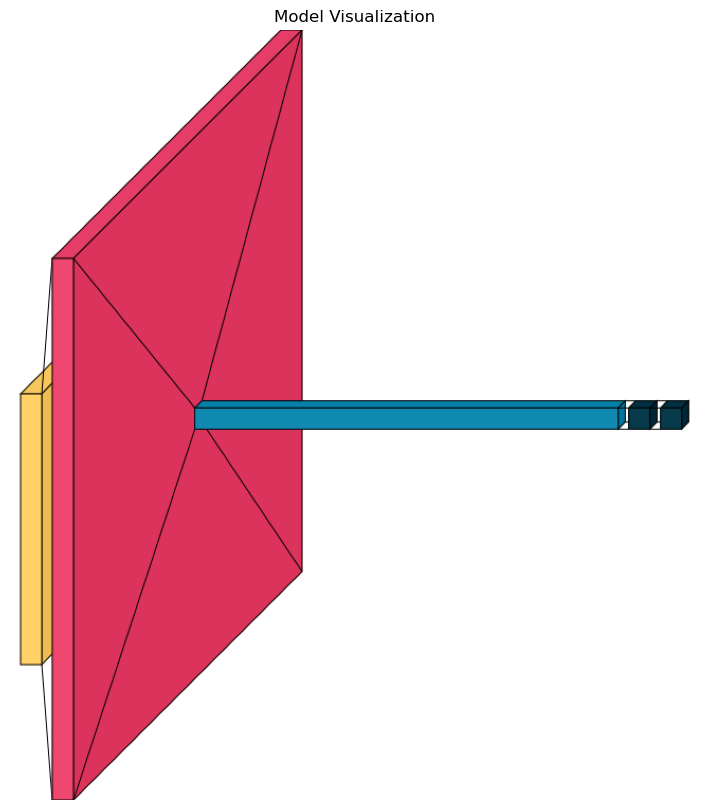

In [90]:
import visualkeras
from PIL import Image

# Save the visualization as an image file
visualization_path = 'model_visualization.png'
visualkeras.layered_view(model).save(visualization_path)

# Display the image using matplotlib
img = Image.open(visualization_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title("Model Visualization")
plt.axis('off')
plt.show()

In [91]:
# plot graph model :

plot_model(model,show_shapes=True,show_layer_names=True,to_file="model.png")

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Results Train :

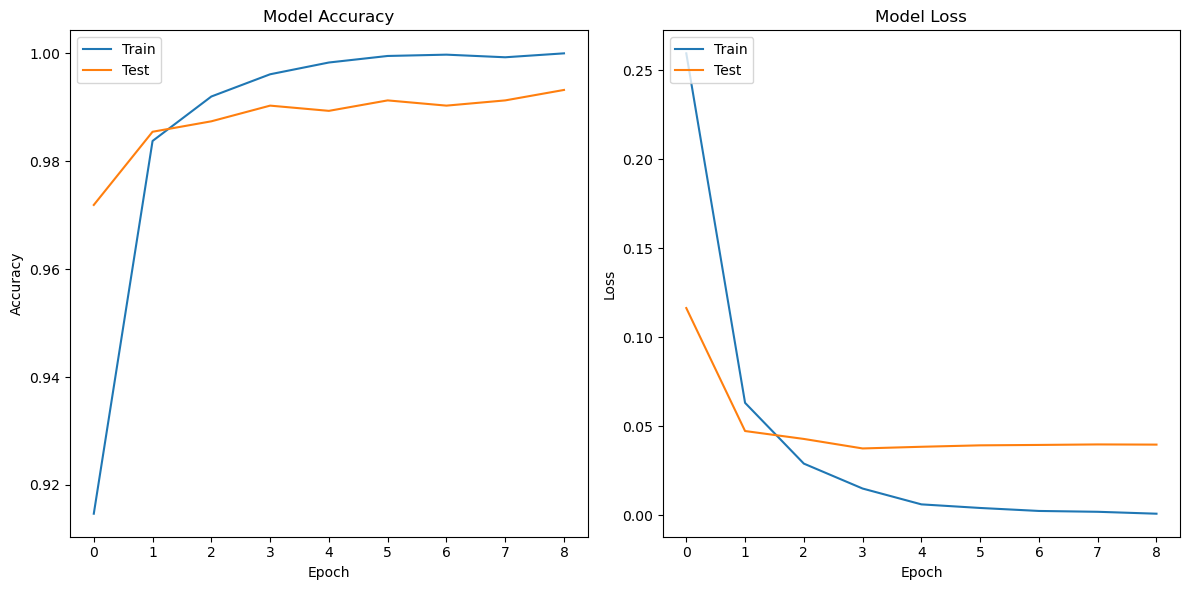

In [92]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Table with Metrics of Traditional ML models :

In [93]:
%%HTML

    <table>
        <tr>
            <th>Model Name</th>
            <th>Mean Squared Error (MSE)</th>
            <th>Model Accuracy</th>
            <th>R^2 Score</th>
         </tr>
        
         <tr>
            <td>AdaBoost Classifier</td>
            <td>0.017937219730941704</td>
            <td>98.21%</td>
            <td> 84.51%</td>
        </tr>

         <tr>
            <td>logistic Regression</td>
            <td>0.016143497757847534</td>
            <td>98.39%</td>
            <td>86.06%%</td>
        </tr>


         <tr>
            <td>Random forest</td>
            <td>0.016143497757847534</td>
            <td>98.39%</td>
            <td> 86.06%%</td>
          
        </tr>


         <tr>
            <td>knn classifier</td>
            <td>0.06278026905829596</td>
            <td>93.72%</td>
            <td> 45.77%%</td>
       
        </tr>


         <tr>
            <td>Decision Tree</td>
            <td>0.06098654708520179</td>
            <td> 93.90%</td>
            <td>47.32%</td>
        
        </tr>
    
</table>


Model Name,Mean Squared Error (MSE),Model Accuracy,R^2 Score
AdaBoost Classifier,0.017937219730941704,98.21%,84.51%
logistic Regression,0.016143497757847534,98.39%,86.06%%
Random forest,0.016143497757847534,98.39%,86.06%%
knn classifier,0.06278026905829596,93.72%,45.77%%
Decision Tree,0.06098654708520179,93.90%,47.32%


## Table with summary of training LSTM Model :

In [94]:
train=pd.read_csv("training.csv")
train

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.874667,0.278244,0.868217,0.162132
1,1,0.979636,0.065774,0.982558,0.060021
2,2,0.995152,0.019366,0.979651,0.071520
3,3,0.998545,0.005922,0.982558,0.069731
4,4,0.999273,0.002886,0.987403,0.063465
...,...,...,...,...,...
62,4,0.998303,0.006009,0.989341,0.038377
63,5,0.999515,0.003984,0.991279,0.039184
64,6,0.999758,0.002307,0.990310,0.039409
65,7,0.999273,0.001837,0.991279,0.039694


## See the best model :

<div style="border: 5px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

                             
<p> &bull; At first we known that Every model has Advantages & disadvantages , so we cant say that there are model is the best at all .  </p> 
<p> &bull; but , in this Dataset , we will detect the best model based on : </p> 
<p> &bull; highest R^2 : CoffientDetermination   </p> 
<p> &bull;MSE : lowest mean square Error  </p>
<p> &bull; Comparing  Metrics   </p>
<p> &bull; After Comparing All of these condation the Best model in Traditional Ml-models : logistic Regression & Random forest </p>
<p> &bull; ANN Model (LSTM) with achive accuracy: 0.9874 & loss: 0.0862   </p>


</div>


<img src="https://storage.googleapis.com/kaggle-datasets-images/2350196/3959932/47967641cb1284290cd619bf52410b7c/dataset-cover.jpg?t=2022-07-19-07-30-01" alt="My Image">